In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt  

In [24]:
with open(r'../../data/tidy/Shrewsbury_join_tidy_CLAY.csv') as Shrewsbury_CLAY:
    df_Shrewsbury_CLAY=pd.read_csv(Shrewsbury_CLAY)

C:\Users\Mahsa\Anaconda3\envs\oxe\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (24,32,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


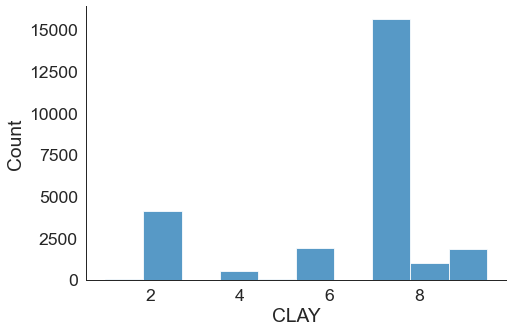

In [26]:
# plotting histogram for CLAY
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_Shrewsbury_CLAY, x="CLAY", kind="hist", bins = 10, aspect = 1.5)

<function matplotlib.pyplot.show(close=None, block=None)>

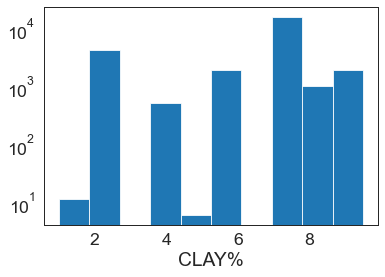

In [27]:
# plotting histogram for CLAY
plt.hist(df_Shrewsbury_CLAY['CLAY'], log=True)
plt.xlabel('CLAY%')
plt.show

In [28]:
df_Shrewsbury_CLAY['log_CLAY'] = np.log10(df_Shrewsbury_CLAY['CLAY'])

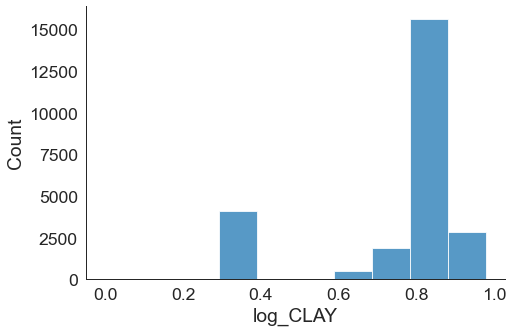

In [35]:
# plotting histogram for CLAY
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_Shrewsbury_CLAY, x="log_CLAY", kind="hist", bins = 10, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
burr,31.482062,540.645536,-166674.880968,inf
norm,32.666077,497.011397,-165773.185236,inf
lognorm,32.673078,499.490671,-165757.708541,inf
gamma,32.742201,496.646507,-165704.934072,inf
beta,34.277451,505.411630,-164550.518154,inf


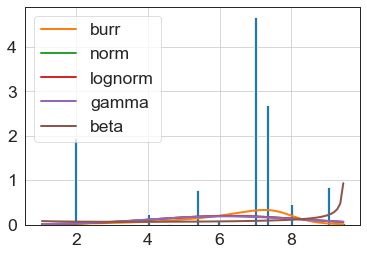

In [31]:
CLAY=df_Shrewsbury_CLAY['CLAY'].values
f = Fitter(CLAY,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
burr,2262.493432,200.656833,-59924.454495,inf
norm,2437.467313,216.692026,-58084.490789,inf
lognorm,2438.412415,218.638451,-58064.684525,inf
gamma,2448.798117,212.156746,-57958.549485,inf
beta,2586.288280,270.390514,-56584.293229,inf


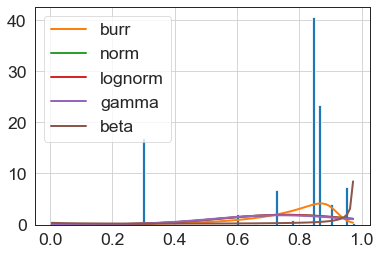

In [38]:
log_CLAY=df_Shrewsbury_CLAY['log_CLAY'].values
f = Fitter(log_CLAY,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [39]:
# We can see that the burr distribution is the best fit based on the sumsquare_error criteria.

In [40]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 270894867.45703506,
  'd': 0.13244415737650223,
  'loc': -5767786.45195516,
  'scale': 5767787.36482293}}

In [41]:
f.fitted_param["burr"]

(270894867.45703506, 0.13244415737650223, -5767786.45195516, 5767787.36482293)